In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib

# Portfolio Analysis
#### Submission by **Maya Gusak** on *11.06.2024*

Read the **transactions** and **prices** into *pandas* DataFrames
> For now, we copy the DataFrame for **transactions** into **tx** for faster testing

In [2]:
# Read the transaction data
tx = pd.read_csv('tx_etf.csv', parse_dates=['date']).set_index('date', drop=True)
prices = pd.read_csv('px_etf.csv', parse_dates=['Date']).set_index('Date', drop=True)

# tx = tx.iloc[0:700].copy() # for testing a smaller data set
pd.to_datetime(tx.index)

DatetimeIndex(['2005-01-03', '2005-01-03', '2005-01-03', '2005-01-03',
               '2005-01-03', '2005-01-03', '2005-01-03', '2005-01-03',
               '2005-01-03', '2005-01-03',
               ...
               '2024-05-27', '2024-05-27', '2024-05-27', '2024-05-27',
               '2024-05-27', '2024-05-27', '2024-05-27', '2024-05-27',
               '2024-05-27', '2024-05-27'],
              dtype='datetime64[ns]', name='date', length=10868, freq=None)

### Portfolio Positions

In [3]:
tx['adjusted_qty'] = tx.apply(lambda row: row['qty'] if row['order'] == 'BUY' else -row['qty'], axis=1)
tx['positions'] = (tx.groupby('ticker'))['adjusted_qty'].cumsum()
positions = tx.pivot_table(index='date', columns='ticker', values='positions', fill_value=0)
positions.reset_index(inplace=False)

ticker,date,IWM,SHY,SPY,TLT,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
0,2005-01-03,2160.0,2359.0,3541.0,2081.0,2121.0,1412.0,2638.0,3074.0,2483.0,1519.0,2511.0,153.0,2719.0
1,2005-01-10,1707.0,2827.0,3274.0,2587.0,1925.0,1398.0,2974.0,3005.0,2436.0,1797.0,2419.0,459.0,2898.0
2,2005-01-17,1725.0,2931.0,3055.0,2858.0,1931.0,1381.0,2954.0,2849.0,2404.0,1791.0,2583.0,654.0,2586.0
3,2005-01-24,1798.0,3099.0,2696.0,3654.0,2199.0,1581.0,2221.0,2891.0,1919.0,1696.0,2803.0,854.0,2077.0
4,2005-01-31,1872.0,2871.0,3099.0,3043.0,2124.0,1646.0,2411.0,2843.0,1929.0,1809.0,2507.0,860.0,2208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,2024-04-29,303.0,1079.0,579.0,0.0,700.0,605.0,635.0,673.0,385.0,847.0,447.0,585.0,432.0
1009,2024-05-06,306.0,1218.0,539.0,0.0,624.0,463.0,795.0,663.0,392.0,924.0,547.0,727.0,345.0
1010,2024-05-13,328.0,1146.0,569.0,0.0,586.0,460.0,738.0,653.0,361.0,815.0,551.0,653.0,350.0
1011,2024-05-20,353.0,1084.0,578.0,0.0,595.0,462.0,743.0,657.0,349.0,685.0,546.0,585.0,371.0


#### Monthly and Annual Positions

In [4]:
positions.resample('ME').last()

ticker,IWM,SHY,SPY,TLT,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
date,,,,,,,,,,,,,
2005-01-31,1872.0,2871.0,3099.0,3043.0,2124.0,1646.0,2411.0,2843.0,1929.0,1809.0,2507.0,860.0,2208.0
2005-02-28,2082.0,717.0,3161.0,3897.0,2169.0,1846.0,1825.0,2727.0,2151.0,2843.0,2229.0,1908.0,2549.0
2005-03-31,2992.0,0.0,3621.0,3410.0,2089.0,1834.0,429.0,3499.0,1653.0,3096.0,2252.0,2531.0,2930.0
2005-04-30,2085.0,0.0,3538.0,5490.0,1962.0,3160.0,0.0,2936.0,318.0,1261.0,4084.0,3419.0,449.0
2005-05-31,1493.0,2262.0,3291.0,5016.0,157.0,1795.0,0.0,2414.0,1382.0,1260.0,3441.0,3066.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-31,82.0,900.0,828.0,0.0,580.0,0.0,820.0,623.0,459.0,564.0,203.0,839.0,561.0
2024-02-29,114.0,1069.0,641.0,0.0,557.0,109.0,752.0,715.0,446.0,770.0,233.0,974.0,474.0
2024-03-31,204.0,819.0,633.0,0.0,594.0,395.0,588.0,660.0,361.0,802.0,394.0,848.0,427.0


In [5]:
positions.resample('YE').last()

ticker,IWM,SHY,SPY,TLT,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
date,,,,,,,,,,,,,
2005-12-31,2217.0,2997.0,3883.0,315.0,1474.0,1355.0,2503.0,2867.0,2314.0,276.0,2201.0,2033.0,1249.0
2006-12-31,1327.0,3346.0,2317.0,2308.0,1258.0,561.0,1826.0,1639.0,1639.0,2555.0,2207.0,2187.0,1858.0
2007-12-31,0.0,6248.0,1279.0,1553.0,1533.0,1573.0,0.0,1569.0,1632.0,2220.0,2133.0,2426.0,0.0
2008-12-31,0.0,11260.0,0.0,2607.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-31,1230.0,4760.0,2247.0,823.0,1321.0,1541.0,530.0,1591.0,1930.0,2768.0,1626.0,2486.0,1886.0
2010-12-31,1540.0,4157.0,2124.0,457.0,1417.0,1500.0,0.0,936.0,2073.0,2918.0,538.0,1968.0,2045.0
2011-12-31,708.0,6446.0,1192.0,1399.0,497.0,0.0,49.0,1087.0,958.0,2258.0,1588.0,1710.0,1103.0
2012-12-31,1391.0,3889.0,1101.0,2152.0,406.0,524.0,1637.0,2005.0,0.0,1278.0,0.0,2776.0,1246.0
2013-12-31,1118.0,2462.0,1510.0,826.0,1360.0,756.0,1060.0,1450.0,1617.0,1279.0,2.0,1129.0,1544.0


#### Computing the Portfolio Values (USD)

In [6]:
values = pd.DataFrame()
for date in positions.index:
    for ticker in positions.columns:
        
        
        price_date = date
        while price_date not in prices.index:
            price_date += dt.timedelta(days=1)
        
    
        values.loc[price_date, ticker] = positions.loc[date, ticker] * prices.loc[price_date, ticker]

values = values.round(2)
print(values)

                  IWM        SHY        SPY        TLT       XLB       XLE  \
2005-01-03  106416.91  138159.00  295193.19  100631.78  40789.88  28820.95   
2005-01-10   80993.41  165243.02  269985.48  125016.00  36316.10  28739.13   
2005-01-18   82678.54  171448.33  252921.03  140899.69  36631.18  29670.94   
2005-01-24   83599.39  181520.66  217744.27  181994.37  40450.64  33875.70   
2005-01-31   89644.84  168062.70  253750.49  152076.59  40000.94  36065.62   
...               ...        ...        ...        ...       ...       ...   
2024-04-29   60587.88   87385.71  295324.74       0.00  63189.00  58315.95   
2024-05-06   62580.06   99011.22  278431.23       0.00  56203.68  43197.90   
2024-05-13   67154.72   93169.80  296397.77       0.00  53783.08  43046.80   
2024-05-20   73614.62   88237.60  306374.68       0.00  54906.60  43585.08   
2024-05-28   71600.84   88617.00  333780.30       0.00  53058.83  41170.26   

                 XLF       XLI       XLK       XLP       XLU   

In [7]:
# Summary of the data
values.describe().round(2)

,IWM,SHY,SPY,TLT,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
count,1013.00,1013.00,1013.00,1013.00,1013.00,1013.00,1013.00,1013.00,1013.00,1013.00,1013.00,1013.00,1013.00
mean,74802.27,220271.54,204809.70,83704.45,33682.00,42761.63,13300.93,50591.22,40619.64,52168.03,47838.05,62547.57,69895.18
std,57335.24,208321.94,118993.96,90943.40,27769.57,66360.26,12346.97,45293.85,35215.70,40654.23,50744.57,52580.83,51265.32
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,22088.75,42793.49,139393.69,0.00,14522.37,0.00,0.00,29400.08,19963.32,32346.13,25766.21,36291.43,36383.31
50%,78670.72,181520.66,220593.99,75818.13,36292.95,30752.17,12783.08,47555.32,37582.77,49254.11,37965.69,58019.19,67666.72
75%,107508.75,325275.39,283093.94,128295.55,45666.28,54818.12,19592.59,63919.19,53767.48,63289.45,52437.21,79846.57,97508.19
max,335324.53,980593.19,510944.65,591729.57,235395.90,621774.84,56904.07,360584.06,315565.81,255364.55,485355.02,381449.78,318094.95


In [8]:
portfolio = values.sum(axis=1, numeric_only=True).rename_axis("Date").rename("Portfolio Value (USD)")
print(portfolio)

Date
2005-01-03     993684.81
2005-01-10    1003389.30
2005-01-18    1006929.30
2005-01-24     998219.96
2005-01-31    1006306.56
                 ...    
2024-04-29    1005182.36
2024-05-06    1007219.98
2024-05-13     998848.43
2024-05-20     999001.73
2024-05-28     913327.29
Name: Portfolio Value (USD), Length: 1013, dtype: float64


<Axes: xlabel='Date'>

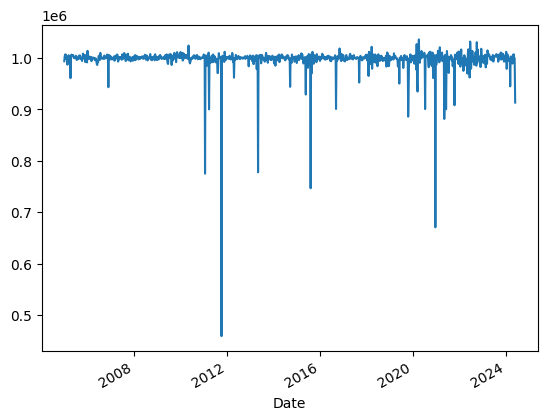

In [9]:
portfolio.plot.line()

#### Monthly Performance

In [10]:
monthly = portfolio.resample('ME').last().rename_axis("Date").rename("Monthly Value")
print(monthly)

Date
2005-01-31    1006306.56
2005-02-28     992541.25
2005-03-31     999758.90
2005-04-30    1006512.62
2005-05-31    1000296.90
                 ...    
2024-01-31    1006728.57
2024-02-29     996695.46
2024-03-31     996909.48
2024-04-30    1005182.36
2024-05-31     913327.29
Freq: ME, Name: Monthly Value, Length: 233, dtype: float64


In [11]:
monthly_differences = monthly.diff().iloc[1:].dropna().rename_axis("Date").rename("Monthly Returns USD")
print(monthly_differences)

Date
2005-02-28   -13765.31
2005-03-31     7217.65
2005-04-30     6753.72
2005-05-31    -6215.72
2005-06-30      872.73
                ...   
2024-01-31     3549.96
2024-02-29   -10033.11
2024-03-31      214.02
2024-04-30     8272.88
2024-05-31   -91855.07
Freq: ME, Name: Monthly Returns USD, Length: 232, dtype: float64


In [12]:
monthly_pct_change = monthly.pct_change().iloc[1:].dropna().rename_axis("Date").rename("Monthly Returns %")
print(monthly_pct_change)


Date
2005-02-28   -0.013679
2005-03-31    0.007272
2005-04-30    0.006755
2005-05-31   -0.006176
2005-06-30    0.000872
                ...   
2024-01-31    0.003539
2024-02-29   -0.009966
2024-03-31    0.000215
2024-04-30    0.008299
2024-05-31   -0.091381
Freq: ME, Name: Monthly Returns %, Length: 232, dtype: float64


<Axes: xlabel='Date'>

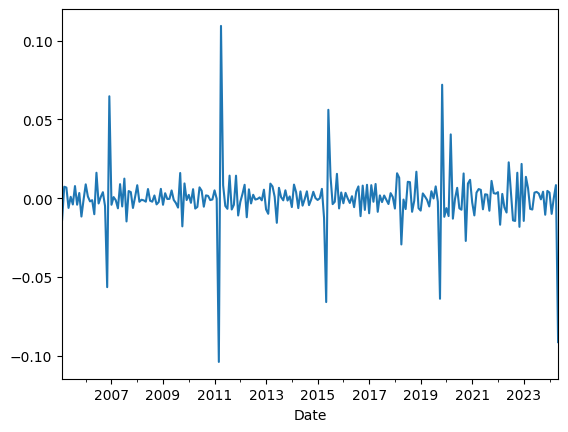

In [13]:
# Monthly returns plot
monthly_pct_change.plot.line()

#### Annual Performance

In [14]:
annual = portfolio.resample('YE').last().rename_axis("Date").rename("Value")
print(annual)

Date
2005-12-31     991320.14
2006-12-31    1004234.24
2007-12-31     996965.40
2008-12-31    1001424.02
2009-12-31    1000027.24
2010-12-31    1000002.50
2011-12-31    1000978.33
2012-12-31    1005069.94
2013-12-31    1000033.57
2014-12-31    1002491.40
2015-12-31    1001156.85
2016-12-31    1002755.21
2017-12-31     999545.94
2018-12-31    1004309.68
2019-12-31     995127.18
2020-12-31    1005266.64
2021-12-31    1012662.65
2022-12-31    1004077.72
2023-12-31    1003178.61
2024-12-31     913327.29
Freq: YE-DEC, Name: Value, dtype: float64


In [15]:
annual_differences = annual.diff().iloc[1:].dropna().rename_axis("Date").rename("Annual Returns USD")
print(annual_differences)

Date
2006-12-31    12914.10
2007-12-31    -7268.84
2008-12-31     4458.62
2009-12-31    -1396.78
2010-12-31      -24.74
2011-12-31      975.83
2012-12-31     4091.61
2013-12-31    -5036.37
2014-12-31     2457.83
2015-12-31    -1334.55
2016-12-31     1598.36
2017-12-31    -3209.27
2018-12-31     4763.74
2019-12-31    -9182.50
2020-12-31    10139.46
2021-12-31     7396.01
2022-12-31    -8584.93
2023-12-31     -899.11
2024-12-31   -89851.32
Freq: YE-DEC, Name: Annual Returns USD, dtype: float64


In [16]:
annual_pct_change = annual.pct_change().iloc[1:].dropna().rename_axis("Date").rename("Annual Returns %")
print(annual_pct_change)

Date
2006-12-31    0.013027
2007-12-31   -0.007238
2008-12-31    0.004472
2009-12-31   -0.001395
2010-12-31   -0.000025
2011-12-31    0.000976
2012-12-31    0.004088
2013-12-31   -0.005011
2014-12-31    0.002458
2015-12-31   -0.001331
2016-12-31    0.001597
2017-12-31   -0.003200
2018-12-31    0.004766
2019-12-31   -0.009143
2020-12-31    0.010189
2021-12-31    0.007357
2022-12-31   -0.008478
2023-12-31   -0.000895
2024-12-31   -0.089567
Freq: YE-DEC, Name: Annual Returns %, dtype: float64


#### Risk Measures

##### Volatility
**Volatility** is a measure of the *degree of variation* in the price of a financial asset over time.
> Higher volatility indicates larger price swings and greater risk.

In [17]:
# Compute the volatility
print("Monthly volatility: ", monthly_pct_change.std().round(5))
print("Annual volatility: ", annual_pct_change.std().round(5))

Monthly volatility:  0.01753
Annual volatility:  0.02154


##### Value at Risk (VaR) 
**VaR** is a statistical measure that estimates the maximum potential loss of a portfolio over a specified time period at a given confidence level.
> A higher VaR indicates greater potential loss and risk.

In [18]:
# Compute the Value at Risk (VaR)
confidence_level = 0.95
print("Monthly 95% VaR: ", monthly_pct_change.quantile(1 - confidence_level).round(5))
print("Annual 95% VaR: ", annual_pct_change.quantile(1 - confidence_level).round(5))

Monthly 95% VaR:  -0.0146
Annual 95% VaR:  -0.01719


##### Sharpe Ratio
**The Sharpe Ratio** is a measure of risk-adjusted return that quantifies the excess return earned per unit of risk.
> A higher Sharpe Ratio indicates better risk-adjusted performance.

In [19]:
# Sharpe Ratio: measures the risk-adjusted return
risk_free_rate = 0.01  # Example risk-free rate
sharpe_ratio = (monthly_pct_change.mean() - risk_free_rate) / monthly_pct_change.std()
print("Monthly Sharpe Ratio 1% risk free rate: ", sharpe_ratio.round(5))
sharpe_ratio = (annual_pct_change.mean() - risk_free_rate) / annual_pct_change.std()
print("Annual Sharpe Ratio 1% risk free rate: ", sharpe_ratio.round(5))

Monthly Sharpe Ratio 1% risk free rate:  -0.58561
Annual Sharpe Ratio 1% risk free rate:  -0.65326


##### The Sortino Ratio
**The Sortino Ratio** is a measure of risk-adjusted return that assesses the excess return per unit of downside risk.
> A higher Sortino Ratio indicates better risk-adjusted performance.

In [20]:
# Sortino Ratio: similar to the Sharpe Ratio, but only considers downside risk
downside_monthly_returns = monthly_pct_change.loc[lambda x: x < 0]
sortino_ratio = (monthly_pct_change.mean() - risk_free_rate) / downside_monthly_returns.std()
print("Sortino ratio (sampled monthly): ", sortino_ratio.round(5))
downside_annual_returns = annual_pct_change.loc[lambda x: x < 0]
sortino_ratio = (annual_pct_change.mean() - risk_free_rate) / downside_annual_returns.std()
print("Sortino ratio (sampled annually): ", sortino_ratio.round(5))

Sortino ratio (sampled monthly):  -0.66404
Sortino ratio (sampled annually):  -0.51668


##### Maximum drawdown
**The max drawdown** is the maximum loss from a peak to a trough of a portfolio or asset
> A larger maximum drawdown indicates a greater decline in value and higher risk.

In [21]:
# Maximum drawdown: the largest peak-to-trough decline in the portfolio value.
cumulative_returns = (1 + monthly_pct_change).cumprod()
peak = cumulative_returns.cummax()
drawdown = (cumulative_returns - peak) / peak
max_drawdown = drawdown.min()
print("Max drawdown (sampled monthly): ", max_drawdown.round(5))

cumulative_returns = (1 + annual_pct_change).cumprod()
peak = cumulative_returns.cummax()
drawdown = (cumulative_returns - peak) / peak
max_drawdown = drawdown.min()
print("Max drawdown (sampled annually): ", max_drawdown.round(5))

Max drawdown (sampled monthly):  -0.10872
Max drawdown (sampled annually):  -0.09809
